In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2024-10-30 15:59:22--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 173.194.212.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.002s  

2024-10-30 15:59:22 (36.3 MB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the text from the provided file path
with open("/content/irish-lyrics-eof.txt", "r") as file:
    corpus = file.read().lower().split("\n")  # Split each line as a separate entry

# Initialize and fit the tokenizer on the text corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Turning each sequence into a set of input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Features (xs) and labels (ys)
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

# Encode labels with one-hot encoding
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Confirm shapes
print("xs shape:", xs.shape)
print("ys shape:", ys.shape)


xs shape: (12038, 15)
ys shape: (12038, 2690)


In [ ]:
#Tokenize the lyrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

#Initialize the Tokenize
tokenizer = Tokenizer()
#Load the text
data = content

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#Turning a sequence into a number of input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#Once you have these input sequences, you can pad them into a regular shape

#Find the longest sentence in the input sequences, and pad everything to that length.
max_sequence_len = max([len(x) for x in input_sequences])

#Let's use pre-padding
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
#print(input_sequences)

#Turning the padded sequences into features (x) and labels (y)
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

#Encode the labels into a set of Ys that can be used for train
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
#print(ys)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           21520     
                                                                 
 bidirectional (Bidirection  (None, 30)                2880      
 al)                                                             
                                                                 
 dense (Dense)               (None, 2690)              83390     
                                                                 
Total params: 107790 (421.05 KB)
Trainable params: 107790 (421.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
61/61 [==============================] - 6s 23ms/step - loss: 7.6886 - accuracy: 0.0640
Epoch 2/100
61/61 [==============================] - 1s 22ms/step - loss: 6.6040 - accuracy: 0.0657
Epoch 3/1

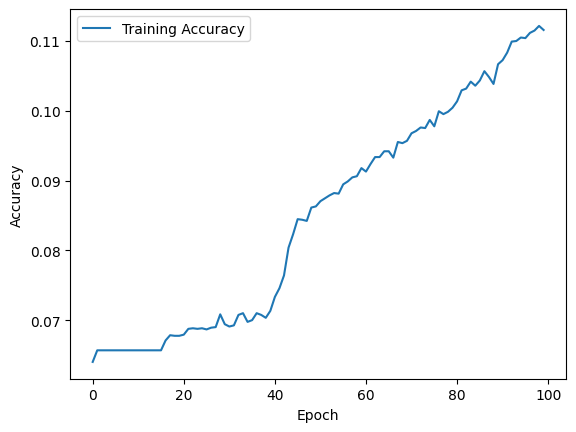

In [ ]:
#Creating the Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

#Model architecture
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

#Model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(xs, ys, epochs=100, verbose=1, batch_size=200)

# Plot training accuracy
import matplotlib.pyplot as plt



# Plot training accuracy versus validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Accuracy is around 10% after trained 100 epoch. This accuracy is very poor, let's try to improve our model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           21520     
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 30)          2880      
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 30)                5520      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2690)              83390     
                                                                 
Total params: 113310 (442.62 KB)
Trainable params: 113310 (442.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1

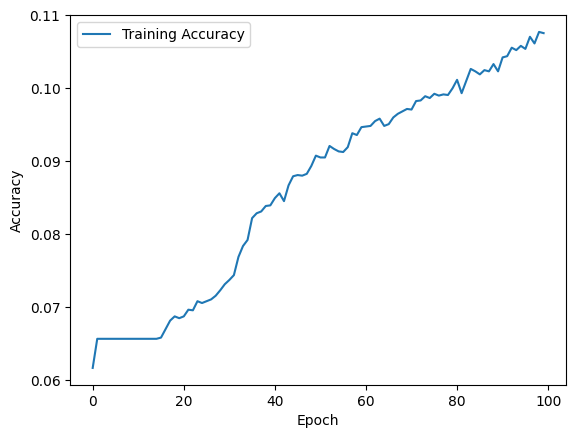

In [ ]:
#Changing the Model Architecture

#One way that you can improve the model is to change its architecture, using multiple stacked LSTMs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

#Model architecture
model = Sequential()
model.add(Embedding(total_words, 8))
#First stacked LSTMs
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
#Second stacked LSTMs
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))


#Model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(xs, ys, epochs=100, verbose=1,  batch_size=200)

# Plot training accuracy
import matplotlib.pyplot as plt



# Plot training accuracy versus validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Save the model
import tensorflow as tf

#This will save the model, including its architecture, optimizer, and learned weights
model.save("/Users/mohamedsalah/Downloads/myModel.h5")

## Load the model
loaded_model = tf.keras.models.load_model("/Users/mohamedsalah/Downloads/myModel.h5")

In [ ]:
#predicting the next words

#Start with a phrase that the network has already seen, “in the town of athy”
seed_text = "in the town of athy"

#Tokenize the seed
token_list = tokenizer.texts_to_sequences([seed_text])[0]

#Pad that sequence to get it into the same shape as the data used for training
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

#predict the next word
predicted = np.argmax(loaded_model.predict(token_list), axis=-1)
print(predicted)

#print a word predicted
for word, index in tokenizer.word_index.items():
    if index == predicted:
        print(word)
        break

1/1 [==============================] - 2s 2s/step
[23]
is


In [ ]:
#Compounding Predictions to Generate Text

import numpy as np

seed_text = "sweet jeremy saw dublin"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probabilities = loaded_model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probabilities)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin love to the heart and the true corporal casey and be and doneen town and the lullaby laughing corporal li


**IMPROVING THE DATA**

There’s a small trick that you can use to extend the size of the dataset without adding any new songs, called **windowing the data.** In the context of text generation, "windows" typically refer to subsequences of words or tokens in a larger text corpus. The goal is to extract these windows to create training samples for a text generation model. There are two types of window which are; overlapping and non-overlapping windows.

**Overlapping Windows**

Overlapping windows involve creating subsequences where each window includes some of the same data points as the previous window.The windows overlap, sharing common elements.

Overlapping windows are often used in tasks where the order and continuity of words are important.
Useful for capturing temporal dependencies and relationships in sequential data, such as language modeling and sequence-to-sequence tasks.

**Non-Overlapping Windows**


Non-overlapping windows involve creating subsequences where each window is disjoint and does not share data points with adjacent windows. The windows are consecutive and non-overlapping.

Non-overlapping windows are simpler and may be used when the order of words is less critical, and the context within each window is sufficient for the task.
Commonly used in tasks like text classification or document categorization.

In [ ]:
#Create Non-Overlapping Windows

window_size = 10
sentences = []
alltext = []

#Load the text
data = content
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words) - window_size

for i in range(0, range_size):
    this_sentence = ""
    for j in range(0, window_size - 1):
        current_word = words[i + j]
        this_sentence = this_sentence + current_word + " "

    sentences.append(this_sentence)


In [ ]:
#sentences

In [ ]:
#Tokenize the lyrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

#Initialize the Tokenize
tokenizer = Tokenizer()
#Load the text
data = sentences

#corpus = data.lower().split("\n")
corpus = data
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#Turning a sequence into a number of input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#Once you have these input sequences, you can pad them into a regular shape

#Find the longest sentence in the input sequences, and pad everything to that length.
max_sequence_len = window_size

#Let's use pre-padding
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

#Turning the padded sequences into features (x) and labels (y)
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]



[[   0    0    0 ...    0   54   12]
 [   0    0    0 ...   54   12  101]
 [   0    0    0 ...   12  101 2689]
 ...
 [   0   22   14 ...  797  151  360]
 [  22   14   43 ...  151  360   47]
 [  14   43  128 ...  360   47  105]]


In [ ]:

#Encode the labels into a set of Ys that can be used for train
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
#print(ys)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           21520     
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 18)          1296      
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 18)                2016      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 2690)              51110     
                                                                 
Total params: 75942 (296.65 KB)
Trainable params: 75942 (296.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100

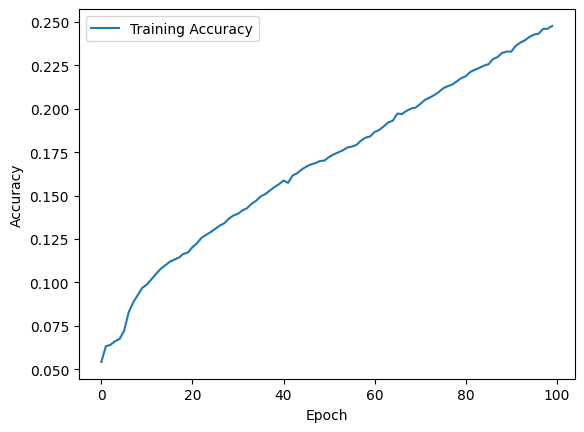

In [ ]:
#One way that you can improve the model is to change its architecture, using multiple stacked LSTMs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

#Model architecture
model = Sequential()
model.add(Embedding(total_words, 8))
#First stacked LSTMs
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
#Second stacked LSTMs
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))


#Model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(xs, ys, epochs=100, verbose=1, batch_size=200)

# Plot training accuracy
import matplotlib.pyplot as plt



# Plot training accuracy versus validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Save the model
import tensorflow as tf

#This will save the model, including its architecture, optimizer, and learned weights
model.save("/Users/mohamedsalah/Downloads/myModel.h5")

## Load the model
modified_loaded_model = tf.keras.models.load_model("/Users/mohamedsalah/Downloads/myModel.h5")

In [ ]:
#predicting the next words

#Start with a phrase that the network has already seen, “in the town of athy”
seed_text = "in the town of athy"

#Tokenize the seed
token_list = tokenizer.texts_to_sequences([seed_text])[0]

#Pad that sequence to get it into the same shape as the data used for training
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

#predict the next word
predicted = np.argmax(modified_loaded_model.predict(token_list), axis=-1)
print(predicted)

#print a word predicted
for word, index in tokenizer.word_index.items():
    if index == predicted:
        print(word)
        break

1/1 [==============================] - 2s 2s/step
[34]
old


In [ ]:
#Compounding Predictions to Generate Text

import numpy as np

seed_text = "sweet jeremy saw dublin"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probabilities = modified_loaded_model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probabilities)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin in the morning in our heart and i met in the county down and i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could not i could


In [ ]:
#Format the generated text to be in a nice readable format

seed_text = "in the town of athy"
next_words = 20

generated_text = []

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probabilities = modified_loaded_model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probabilities)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    seed_text += " " + output_word
    generated_text.append(output_word)

# Print the generated text in a nice format
generated_sentences = [generated_text[i:i+10] for i in range(0, len(generated_text), 10)]
for sentence in generated_sentences:
    print(' '.join(sentence))


old love in the town of the world the more
in the rocky rosin the bow the man will a
